# check pseudobulk matrices

In [1]:
setwd('/charonfs/scratch/users/astar/gis/limchr/scATAC_celltypes/code')
library(Signac)
library(Seurat)
library(Matrix)
library(patchwork)
library(ggplot2)
library(rtracklayer)
library(GenomicRanges)
source("utilities.R")
library(tidyr)

Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.

### load cell type x ccre matrix

In [39]:
adrenal <- readRDS("../data/adrenal/adrenal_pseudobulk.rds")

In [41]:
dim(adrenal)
adrenal[1:2,1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                                           
1 19.56182 1.173709 . . .         . . .         . .        
3 13.19711 1.419044 . . 0.1419044 . . 0.1419044 . 0.1419044

In [5]:
esophagus <- readRDS("../data/esophagus/esophagus_pseudobulk.rds")

In [7]:
dim(esophagus)
esophagus[1:2, 1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                                                       
2 9.459619 0.472981 .         0.1182452 0.2364905 . 0.1182452 0.5912262
3 6.794721 1.960016 0.1306677 .         0.1306677 . .         0.1306677
                     
2 .         0.1182452
3 0.1306677 .        

In [8]:
heart_fetal <- readRDS("../data/heart_fetal/heart_fetal_pseudobulk.rds")

In [10]:
dim(heart_fetal)
heart_fetal[1:4,1:10]

[1]       4 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



4 x 10 sparse Matrix of class "dgCMatrix"
                                                                             
1 12.734429 0.9261403 0.2315351 .         .         . . . 0.2315351 .        
3  7.354443 0.4085802 .         .         0.2042901 . . . 0.2042901 0.2042901
7  4.360092 1.9235701 .         .         .         . . . .         .        
9 21.160628 1.2824623 0.3206156 0.3206156 .         . . . .         .        

In [2]:
heartRV <- readRDS("../data/heartRV/heartRV_pseudobulk.rds")

In [4]:
dim(heartRV)
heartRV[1:4, 1:10]

[1]       4 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



4 x 10 sparse Matrix of class "dgCMatrix"
                                                             
1 11.091305 0.5941771 0.5941771 . . . . .         .         .
2 15.272244 0.9960159 0.3320053 . . . . 0.3320053 0.1660027 .
5 29.000000 0.3333333 .         . . . . .         .         .
9  7.990479 0.1700102 .         . . . . .         .         .

In [44]:
liver <- readRDS("../data/liver/liver_pseudobulk.rds")

In [46]:
dim(liver)
liver[1:2,1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                    
3 6.996065 1.3117621 . . . . . . . .
7 8.828398 0.5517749 . . . . . . . .

In [14]:
left_colon <- readRDS("../data/left_colon/left_colon_pseudobulk.rds")

In [16]:
dim(left_colon)
left_colon[1:2,1:10]

[1]       2 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



2 x 10 sparse Matrix of class "dgCMatrix"
                                                           
1 11.92525 1.106467 0.1229407 .         . . . . .         .
3 22.05293 .        0.4009623 0.4009623 . . . . 0.4009623 .

In [11]:
psoas_muscle <- readRDS("../data/psoas_muscle/psoas_muscle_pseudobulk.rds")

In [13]:
dim(psoas_muscle)
psoas_muscle[1:3,1:10]

[1]       3 1520441

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



3 x 10 sparse Matrix of class "dgCMatrix"
                                                    
1 12.46106 0.5497526 0.1832509 . 0.1832509 . . . . .
2 11.71244 0.8077544 .         . 0.1346257 . . . . .
3 13.78601 0.6172840 0.2057613 . .         . . . . .

### add rownames

In [43]:
adrenal_rownames <- c("adrenal1", "adrenal2")
rownames(adrenal) <- adrenal_rownames

In [18]:
esophagus_rownames <- c("esophagus2", "esophagus3")
rownames(esophagus) <- esophagus_rownames

In [21]:
heartfetal_rownames <- c("heart_fetal1", "heart_fetal3", "heart_fetal7", "heart_fetal9")
rownames(heart_fetal) <- heartfetal_rownames

In [24]:
heartRV_rownames <- c("heartRV1", "heartRV2", "heartRV5", "heartRV9")
rownames(heartRV) <- heartRV_rownames

In [27]:
leftcolon_rownames <- c("left_colon1", "left_colon3")
rownames(left_colon) <- leftcolon_rownames

In [48]:
liver_rownames <- c("liver3", "liver7")
rownames(liver) <- liver_rownames

In [30]:
psoasmuscle_rownames <- c("psoas_muscle1", "psoas_muscle2", "psoas_muscle3")
rownames(psoas_muscle) <- psoasmuscle_rownames

### combine matrices

In [50]:
combined_pseudobulk <- rbind(adrenal, esophagus, heart_fetal, heartRV, 
                             left_colon, liver, psoas_muscle)

In [51]:
dim(combined_pseudobulk)

[1]      19 1520441

In [56]:
combined_pseudobulk[1:19,1:10]

  [[ suppressing 10 column names ‘chr1-9919-10727’, ‘chr1-11043-11422’, ‘chr1-13249-13832’ ... ]]



19 x 10 sparse Matrix of class "dgCMatrix"
                                                                           
adrenal1      19.561815 1.1737089 .         .         .         . .        
adrenal2      13.197105 1.4190436 .         .         0.1419044 . .        
esophagus2     9.459619 0.4729810 .         0.1182452 0.2364905 . 0.1182452
esophagus3     6.794721 1.9600157 0.1306677 .         0.1306677 . .        
heart_fetal1  12.734429 0.9261403 0.2315351 .         .         . .        
heart_fetal3   7.354443 0.4085802 .         .         0.2042901 . .        
heart_fetal7   4.360092 1.9235701 .         .         .         . .        
heart_fetal9  21.160628 1.2824623 0.3206156 0.3206156 .         . .        
heartRV1      11.091305 0.5941771 0.5941771 .         .         . .        
heartRV2      15.272244 0.9960159 0.3320053 .         .         . .        
heartRV5      29.000000 0.3333333 .         .         .         . .        
heartRV9       7.990479 0.1700102 .         .

### check UMAPs, number of cells per tissue type

In [ ]:
adrenal = 12159
esophagus = 16110
heart_fetal = 20131
heartRV = 19955
left_colon = 10628
liver = 10011
psoas_muscle = 17745

An object of class Seurat 
200132 features across 12159 samples within 1 assay 
Active assay: ATAC (200132 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

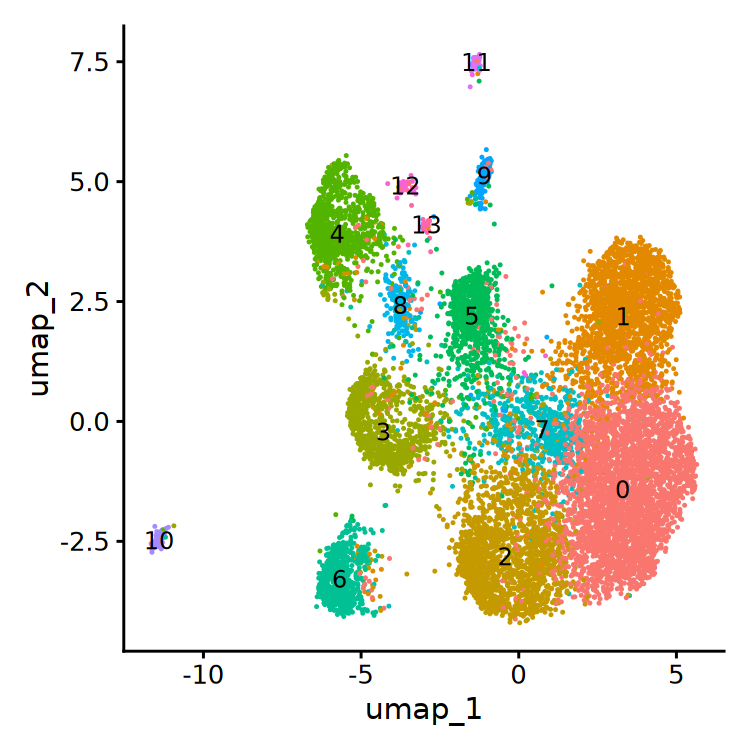

In [61]:
cell_type <- "adrenal"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
226707 features across 16110 samples within 1 assay 
Active assay: ATAC (226707 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

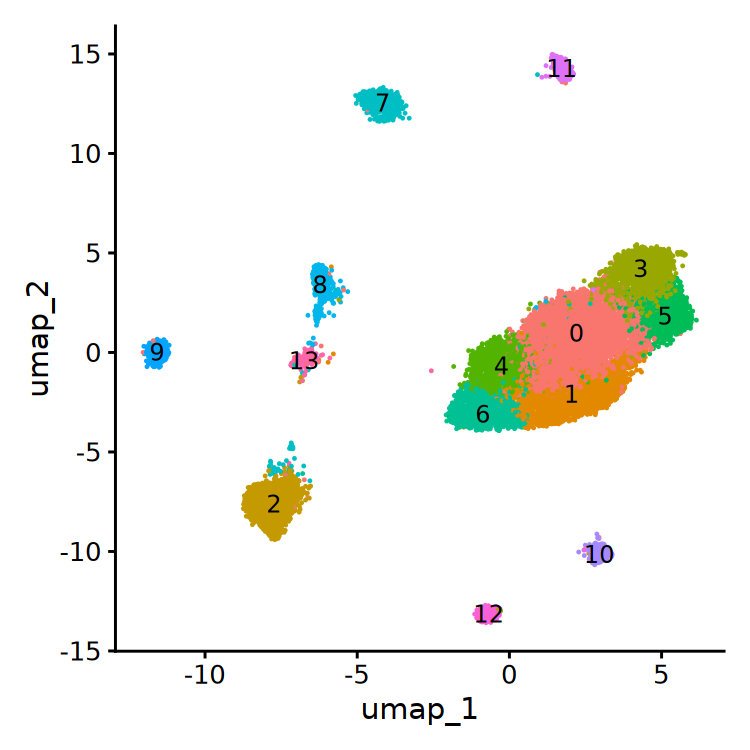

In [62]:
cell_type <- "esophagus"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
188067 features across 20131 samples within 1 assay 
Active assay: ATAC (188067 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

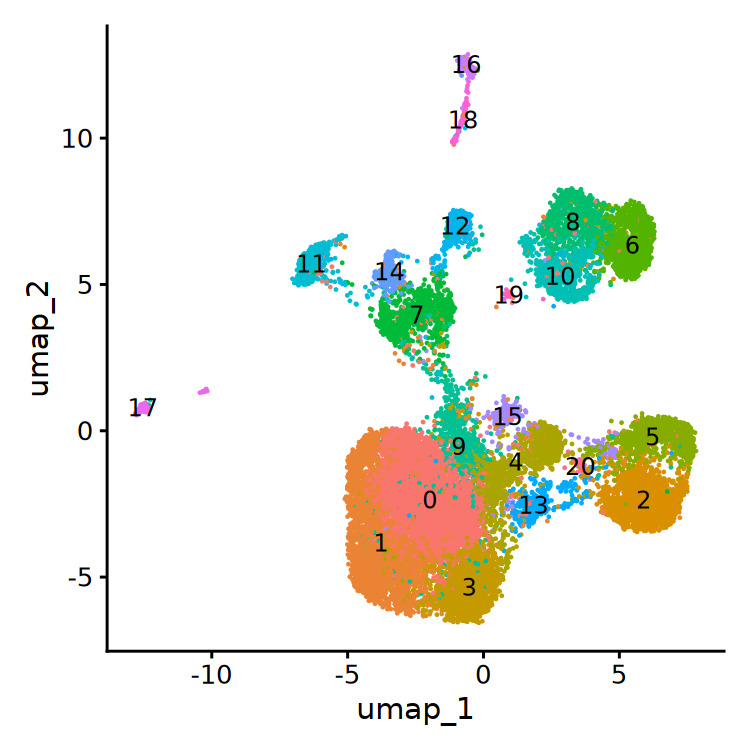

In [63]:
cell_type <- "heart_fetal"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
322017 features across 19955 samples within 1 assay 
Active assay: ATAC (322017 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

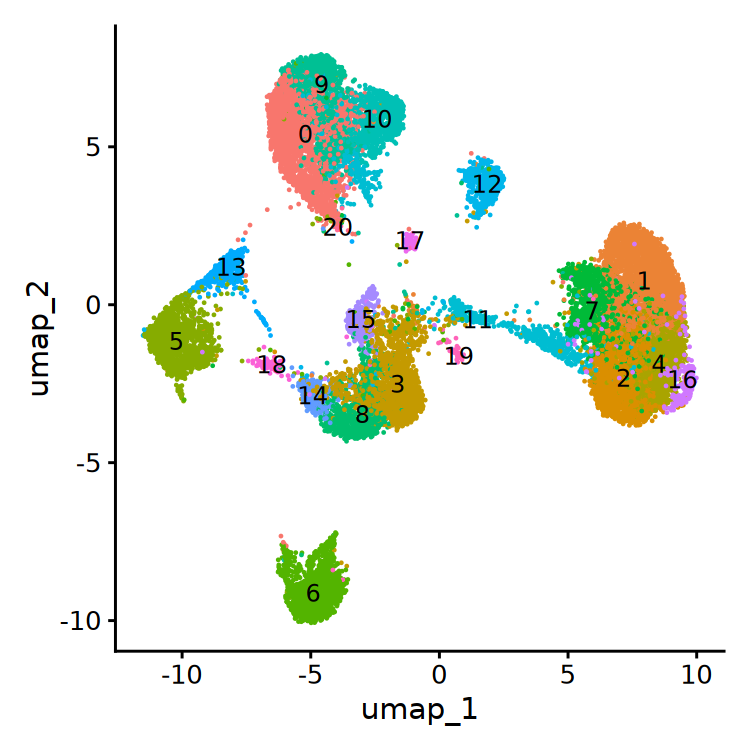

In [64]:
cell_type <- "heartRV"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
188210 features across 10628 samples within 1 assay 
Active assay: ATAC (188210 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

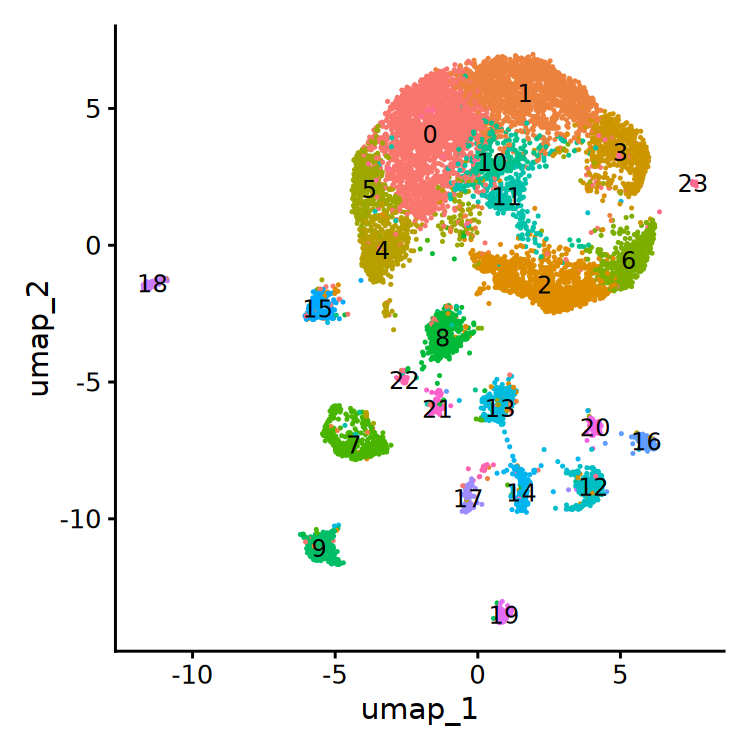

In [65]:
cell_type <- "left_colon"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
179429 features across 10011 samples within 1 assay 
Active assay: ATAC (179429 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

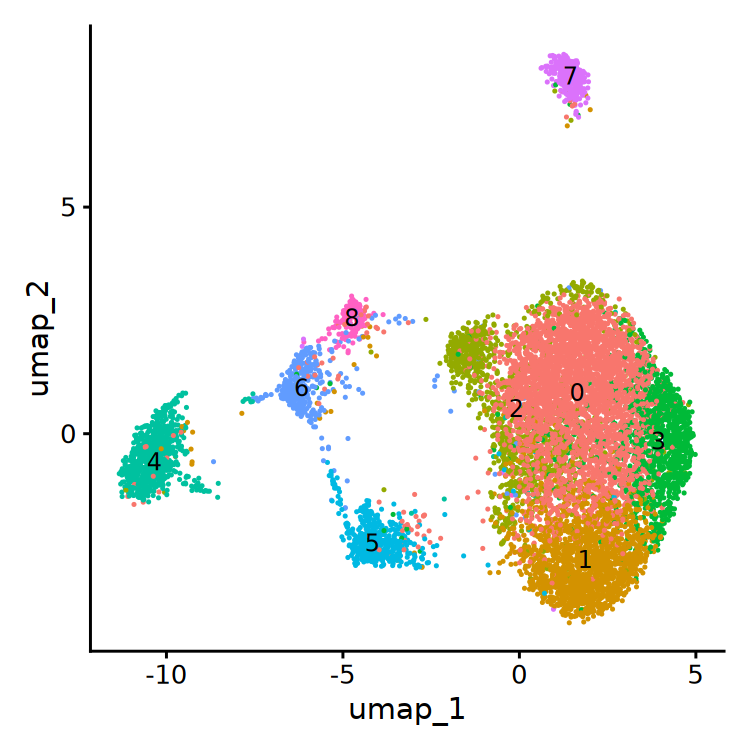

In [66]:
cell_type <- "liver"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()

An object of class Seurat 
150366 features across 17745 samples within 1 assay 
Active assay: ATAC (150366 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: integrated_lsi, umap

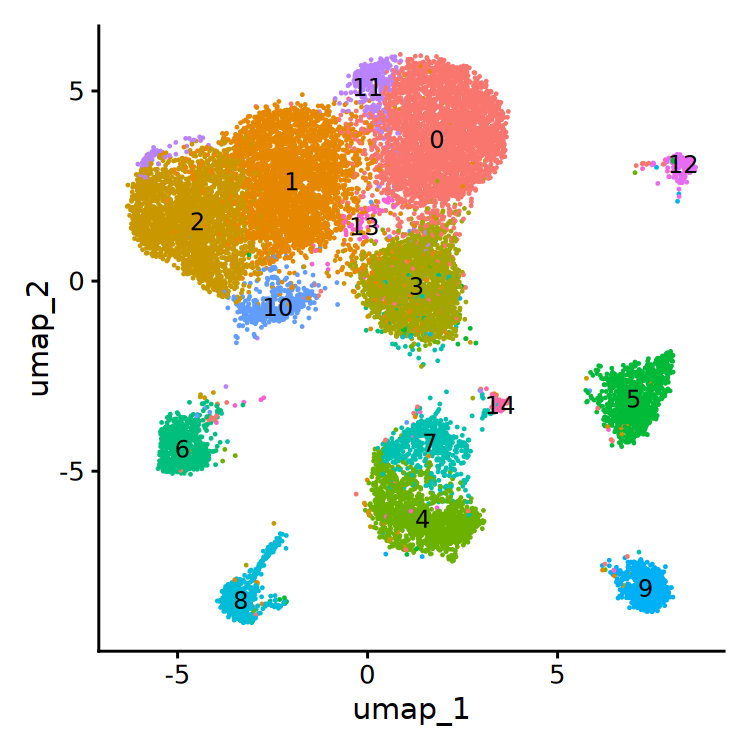

In [67]:
cell_type <- "psoas_muscle"
obj <- readRDS(paste0("../data/",cell_type,"/",cell_type,"_integrated.rds"))
obj

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
DimPlot(object = obj, label = TRUE) + NoLegend()
#DimPlot(obj, group.by = 'dataset', label = TRUE) + NoLegend()